# Stock Market Analysis 


# 1. The change in price of the stock overtime


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400,AMAZON
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000,AMAZON
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800,AMAZON
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300,AMAZON
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,128999900,AMAZON
2022-11-07,91.949997,92.099998,89.040001,90.529999,90.529999,77495700,AMAZON
2022-11-08,90.790001,91.720001,88.230003,89.980003,89.980003,88703400,AMAZON
2022-11-09,89.470001,89.480003,85.870003,86.139999,86.139999,90796200,AMAZON
2022-11-10,92.940002,98.690002,91.650002,96.629997,96.629997,173414900,AMAZON


In [5]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.169960,160.396574,156.137769,158.350877,157.769967,9.190605e+07
std,12.819703,12.623590,12.857785,12.744447,12.548138,2.608584e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,5.121820e+07
25%,147.415001,149.820000,145.135002,148.215004,147.764297,7.414710e+07
50%,159.589996,162.139999,156.720001,159.300003,158.646835,8.722780e+07
75%,169.385002,171.065002,167.300003,169.060005,168.490730,1.043103e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-15 to 2022-11-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


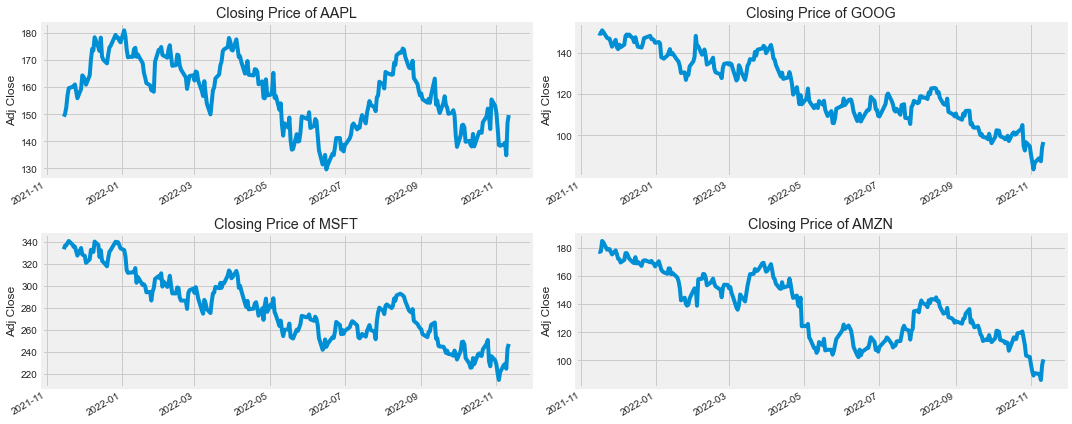

In [7]:
# A historical view of the closing prices


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

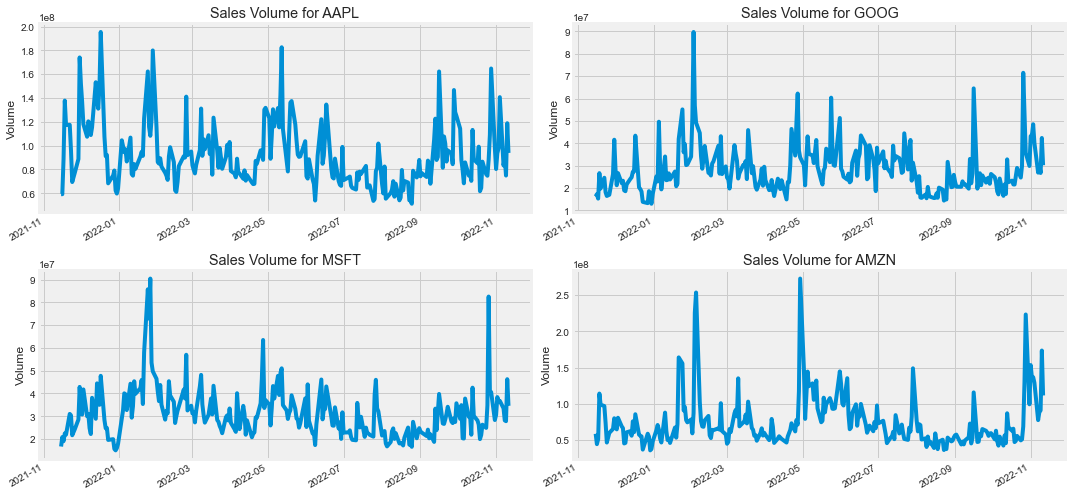

In [8]:
# Plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

We've seen the visualizations for the closing price and the volume traded each day.

# 2. The moving average of the various stocks

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [34]:
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

In [36]:
# df.groupby("company_name").hist(figsize=(12, 12));

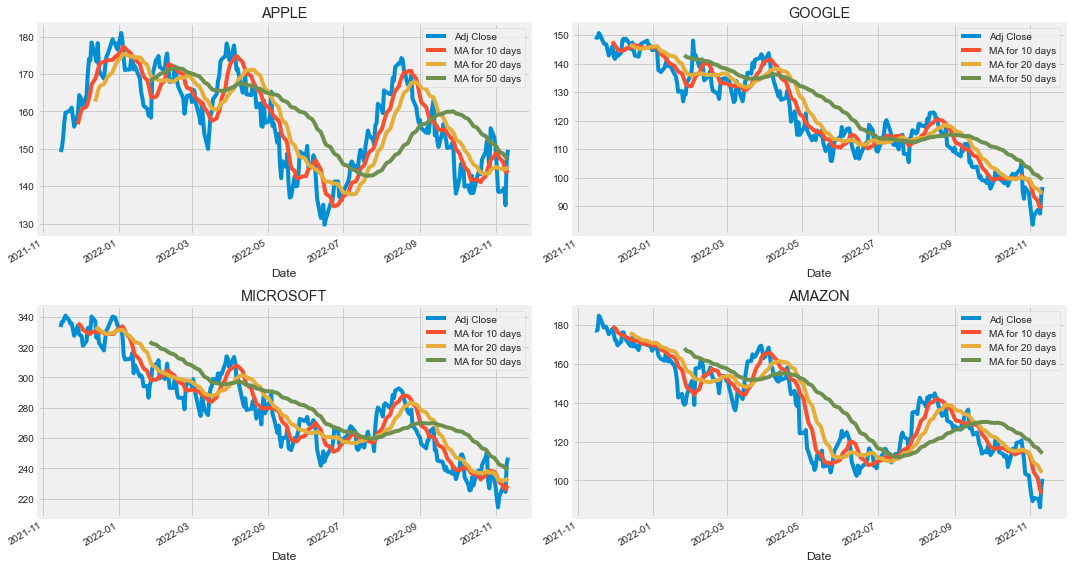

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. The daily return of the stock on average

Now that we've done some baseline analysis, we're now going to analyze the risk of the stock. 
In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. 
using pandas to retrieve the daily returns for the Apple stock.

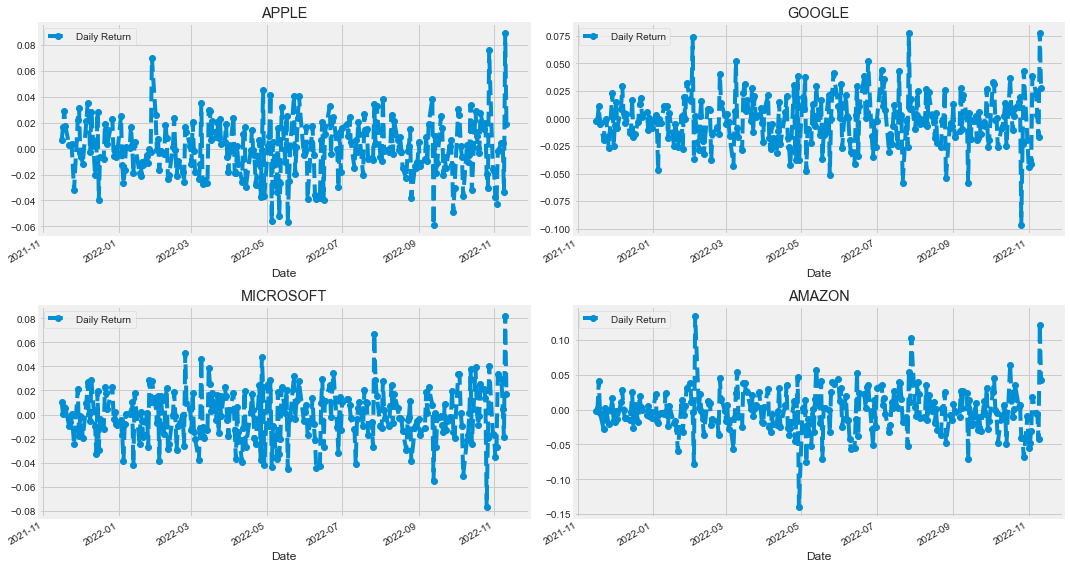

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

using seaborn to create both a histogram and kde plot on the same figure to get an overall look at the average daily return 

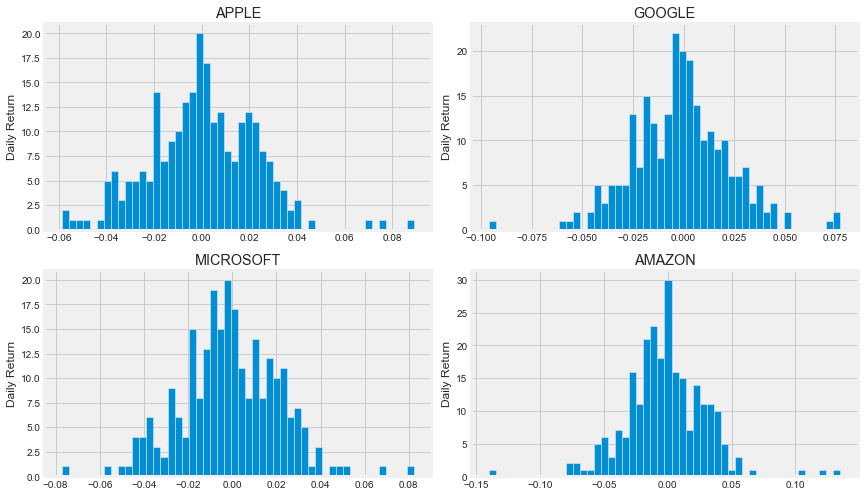

In [14]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. The correlation between different stocks closing prices

building a DataFrame with all the ['Close'] columns for each of the stocks dataframes to analyze the returns of all the stocks in our list

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-12,149.124527,149.645493,333.923370,176.257507
2021-11-15,149.134460,149.388000,333.278809,177.283997
2021-11-16,150.128693,149.076004,336.690216,177.035004
2021-11-17,152.604340,149.061996,336.918701,177.449997
2021-11-18,156.959045,150.709000,339.054749,184.802994


Having all the closing prices, get the daily return for all the stocks, like we did for the Apple stock.

In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-12,NaN,NaN,NaN,NaN
2021-11-15,0.000067,-0.001721,-0.001930,0.005824
2021-11-16,0.006667,-0.002088,0.010236,-0.001404
2021-11-17,0.016490,-0.000094,0.000679,0.002344
2021-11-18,0.028536,0.011049,0.006340,0.041437


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

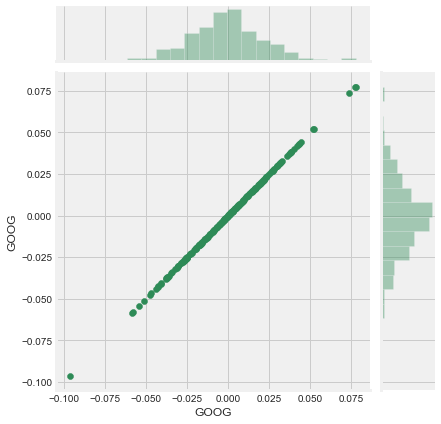

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

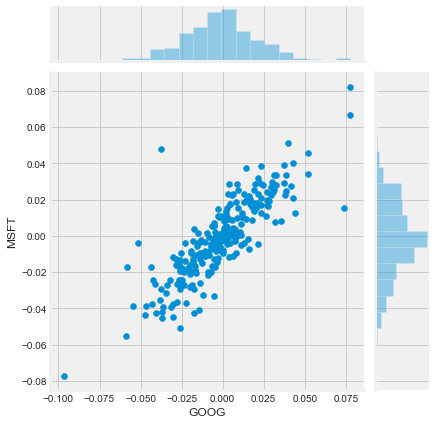

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

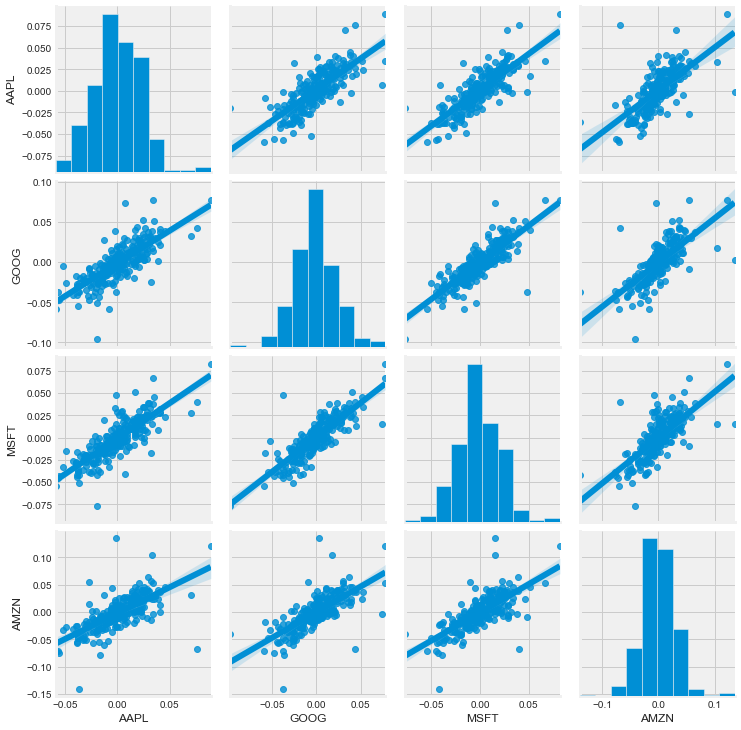

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

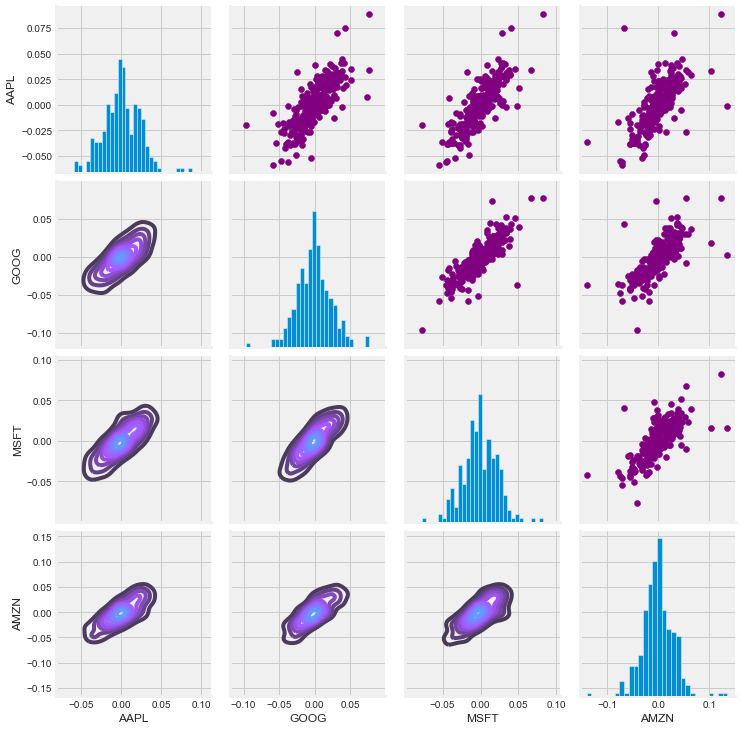

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

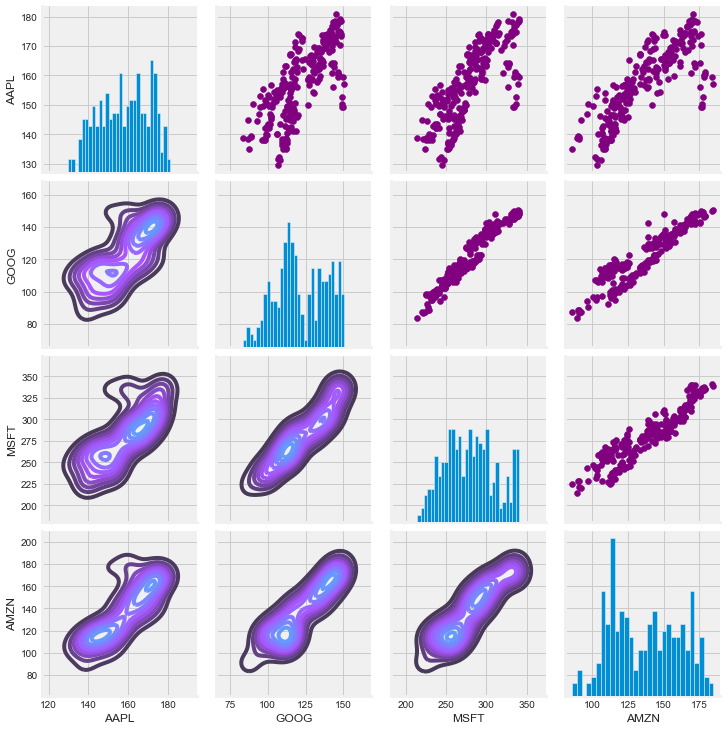

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

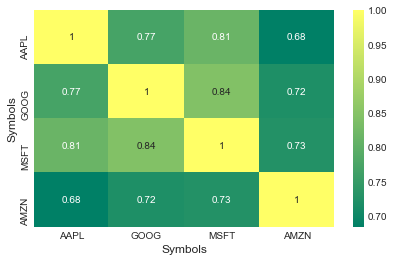

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

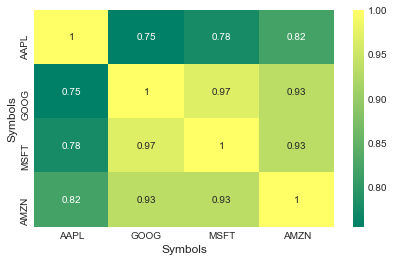

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. Calculating value at risk by investing in a particular stock

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

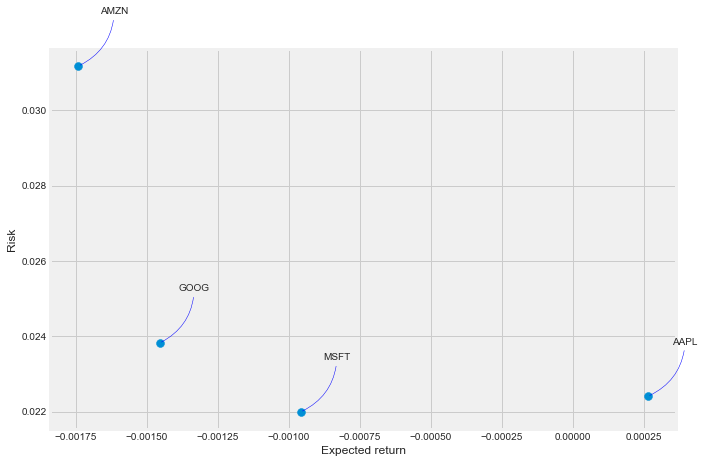

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of AMAZON inc:

In [25]:
# Get the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.974000,8.777500,8.794500,8.951500,102216000.0,8.951500
2012-01-04,9.025000,8.803500,8.960500,8.875500,84104000.0,8.875500
2012-01-05,8.912500,8.702500,8.797000,8.880500,76182000.0,8.880500
2012-01-06,9.232500,8.875000,8.903500,9.130500,140168000.0,9.130500
2012-01-09,9.218500,8.850000,9.138000,8.928000,101138000.0,8.928000
...,...,...,...,...,...,...
2022-11-07,92.099998,89.040001,91.949997,90.529999,77495700.0,90.529999
2022-11-08,91.720001,88.230003,90.790001,89.980003,88703400.0,89.980003
2022-11-09,89.480003,85.870003,89.470001,86.139999,90796200.0,86.139999


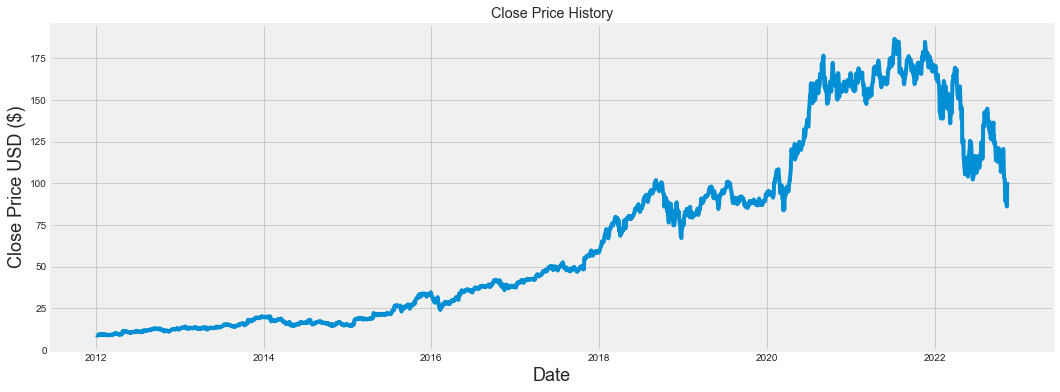

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2599

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [4.35066439e-01],
       [4.94073933e-01],
       [5.17474451e-01]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2539/2539 [==============================] - 48s 18ms/step - loss: 0.0020


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 22ms/step


7.70729257250028

<ipython-input-32-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


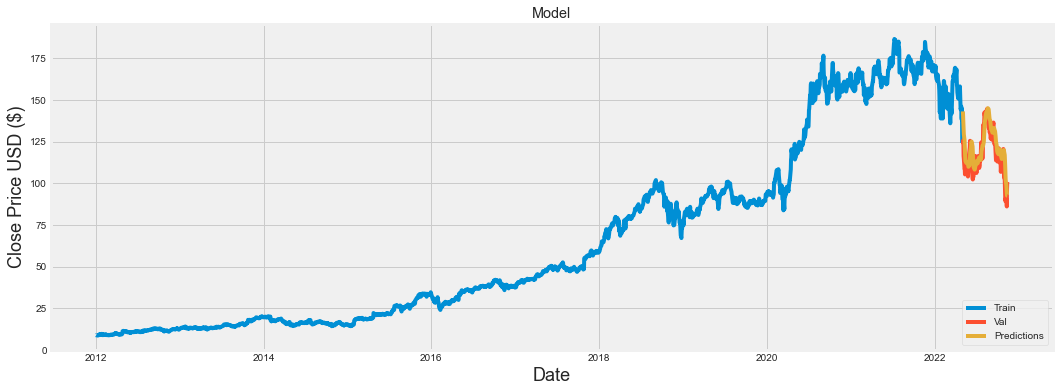

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-05-02,124.500000,143.143021
2022-05-03,124.253502,139.171921
2022-05-04,125.928497,135.466003
2022-05-05,116.406998,132.650314
2022-05-06,114.772499,129.318893
...,...,...
2022-11-07,90.529999,98.868713
2022-11-08,89.980003,96.283463
2022-11-09,86.139999,94.404564
